# Advanced image processes

&copy; 李浩东 3190104890@zju.edu.cn

- Perspective transformation
- Basic morphological operations


# Perspective transformation

- Perspective transformation is to project the image onto a new viewing plane

![perspective_transformation](./images/perspective_transformation.png)


### Basic principle of perspective transformation

- The general transformation formula is

$$
\left[\begin{array}{lll}
x^{\prime} & y^{\prime} & w^{\prime}
\end{array}\right]=\left[\begin{array}{lll}
u & v & w
\end{array}\right] \cdot\left[\begin{array}{lll}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{array}\right] \quad T=\left[\begin{array}{lll}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{array}\right]=\left[\begin{array}{ll}
T_{1} & T_{2} \\
T_{3} & a_{33}
\end{array}\right]
$$

- $u$, $v$ are the original pixel coordinates, $x'$, $y'$ are the transformed pixel coordinates, $T$ is the perspective transformation matrix
- $T_1$ represents image linear transformation, $T_2$ is used to generate image perspective transformation, $T_3$ represents image translation, $a_{33}$ is usually taken as $1$


- Its mathematical expression is as follows

$$
x=\frac{x^{\prime}}{w^{\prime}}=\frac{a_{11} u+a_{21} v+a_{31}}{a_{13} u+a_{23} v+a_{33}} \quad y=\frac{y^{\prime}}{w^{\prime}}=\frac{a_{12} u+a_{22} v+a_{32}}{a_{13} u+a_{23} v+a_{33}}
$$

- Given the four pairs of pixel coordinates of the perspective transformation, the perspective transformation matrix can be obtained
- Given a perspective transformation matrix, the perspective transformation can be done


- During the perspective transformation process, the area of the original image may become larger, which will cause some pixels of the transformed image to not correspond to the original image, and the background color will appear
- Therefore, after the perspective transformation, the transformation map needs to be interpolated to obtain the final target image

| Original|No-interpolation |Interpolation |
|:--:|:--:|:--:|
| <img src="./images/cv_small.png" width="500" />| <img src="./images/cv_1.png" width="500" /> | <img src="./images/cv_2.png" width="500" />|


### Affine (parallel) transformation

- Affine transformation is a special form of perspective transformation, which can maintain the straightness and parallelism of two-dimensional images, and can be used for rotation, translation, scaling, staggering and inversion
- Its transformation formula and transformation matrix are as follows

$$
\left[\begin{array}{lll}
x & y & 1
\end{array}\right]=\left[\begin{array}{lll}
x & y^{\prime} & 1
\end{array}\right]=\left[\begin{array}{lll}
u & v & 1
\end{array}\right] \cdot\left[\begin{array}{lll}
a_{11} & a_{12} & 0 \\
a_{21} & a_{22} & 0 \\
a_{31} & a_{32} & 1
\end{array}\right] \quad T=\left[\begin{array}{lll}
a_{11} & a_{12} & 0 \\
a_{21} & a_{22} & 0 \\
a_{31} & a_{32} & 1
\end{array}\right]=\left[\begin{array}{cc}
T_{1} & T_{2} \\
T_{3} & 1
\end{array}\right]
$$


|Affine |Normal |
|:--:|:--:|
| <img src="./images/affine_tran.png" width="700" />| <img src="./images/normal_tran.png" width="700" /> | 

(533, 800, 3)


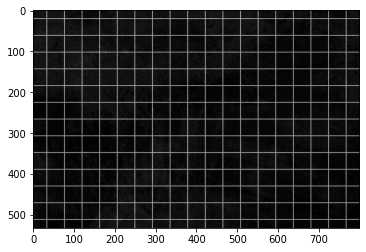

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as mat_color

img_ori = cv2.imread("./images/grid.jpg")
print(img_ori.shape)
no_norm = mat_color.Normalize(vmin=0, vmax=255, clip=False)
plt.imshow(img_ori, "gray", norm=no_norm)
# !jt -f office -tf robotosans -tfs 14 -nf robotosans -nfs 14 -t oceans16

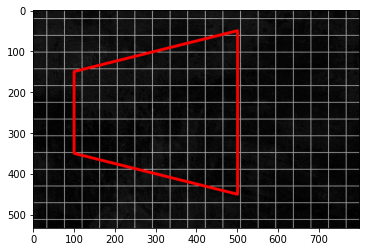

In [2]:
pts = np.array([[100, 150], [500, 50], [500, 450], [100, 350]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img_ori, [pts], True, (255, 0, 0), thickness=5)
plt.imshow(img_ori, norm=no_norm)

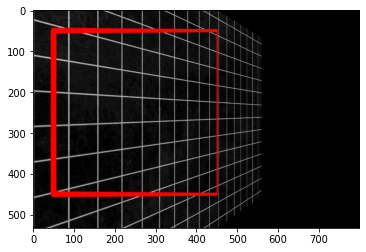

In [3]:
# specify input and output coordinates
input_pts = np.float32([[100, 150], [500, 50], [500, 450], [100, 350]])
output_pts = np.float32([[50, 50], [450, 50], [450, 450], [50, 450]])
# compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts, output_pts)
# apply the perspective transformation to the image
img_per = cv2.warpPerspective(img_ori, M,(img_ori.shape[1], img_ori.shape[0]),
                              flags=cv2.INTER_LINEAR)
plt.imshow(img_per, norm=no_norm)

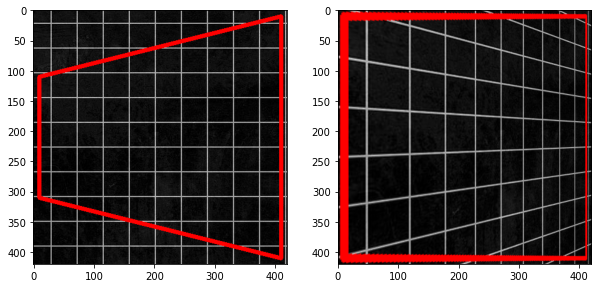

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_ori[50 - 10:450 + 10, 100 - 10:500 + 10], "gray", norm=no_norm)
plt.subplot(1, 2, 2)
plt.imshow(img_per[50 - 10:450 + 10, 50 - 10:450 + 10], norm=no_norm)

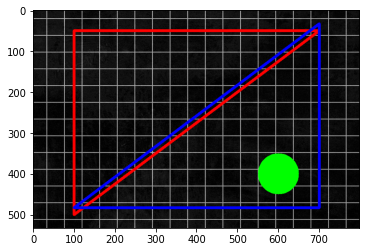

In [5]:
img_ori = cv2.imread("./images/grid.jpg")
# define the 3 pairs of corresponding points 
start_pts = [[100, 50], [700, 50], [100, 500]]
dst_pts = [[img_ori.shape[1] - 100, img_ori.shape[0] - 50], 
           [img_ori.shape[1] - 700, img_ori.shape[0] - 50], 
           [img_ori.shape[1] - 100, img_ori.shape[0] - 500]]
pts = np.array(start_pts, np.int32)
pts_dst = np.array(dst_pts, np.int32)
pts, pts_dst = pts.reshape((-1, 1, 2)), pts_dst.reshape((-1, 1, 2))
cv2.polylines(img_ori, [pts], True, (255, 0, 0), thickness=5)
cv2.polylines(img_ori, [pts_dst], True, (0, 0, 255), thickness=5)
cv2.circle(img_ori, (600, 400), 50, (0, 255, 0), -1)
plt.imshow(img_ori, norm=no_norm)

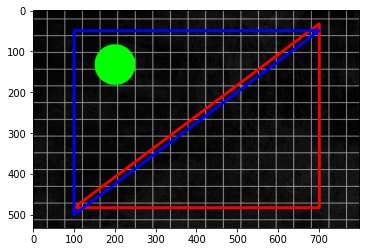

In [6]:
src_tri = np.array(start_pts).astype(np.float32)
dst_tri = np.array(dst_pts).astype(np.float32)
# calculate the transformation matrix using cv2.getAffineTransform()
warp_mat = cv2.getAffineTransform(src_tri, dst_tri)
# apply the affine transformation using cv2.warpAffine()
warp_dst = cv2.warpAffine(img_ori, warp_mat, (img_ori.shape[1], img_ori.shape[0]))
plt.imshow(warp_dst, norm=no_norm)

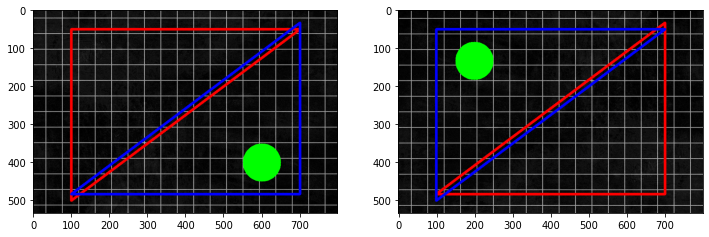

In [7]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.imshow(img_ori, norm=no_norm)
plt.subplot(1, 2, 2)
plt.imshow(warp_dst, norm=no_norm)

# Basic morphological operations

![morphological_operations](./images/morphological_operations.png)


- The basic idea of mathematical morphology is to measure and extract the corresponding shape in the image with structural elements with a certain shape, so as to achieve the purpose of image analysis and recognition
- It can simplify image data, keep their basic shape properties, and remove irrelevant structures
- Mathematical morphology is composed of a set of morphological algebraic operators, and it has 4 basic operations: ***Dilation***, ***Erosion***, ***Opening*** and ***Closing***
- Based on these basic operations, various mathematical morphological practical algorithms can be derived and combined, which can be used to analyze and process image shape and structure, including image segmentation, feature extraction, boundary detection, image filtering, image enhancement and restoration, etc

### Dilation

- This operations consists of convolving an image $A$ with some kernel $B$, which can have any shape or size, usually a square or circle
- The kernel $B$ has a defined anchor point, usually being the center of the kernel
- As the kernel $B$ is scanned over the image, we compute the ***maximal*** pixel value overlapped by $B$ and replace the image pixel in the anchor point position with that maximal value. As you can deduce, this maximizing operation causes bright regions within an image to "grow" (therefore the name dilation)

$$
\operatorname{dst}(x, y)=\max _{\left(x^{\prime}, y^{\prime}\right): \text { element }\left(x^{\prime}, y^{\prime}\right) \neq 0} \operatorname{src}\left(x+x^{\prime}, y+y^{\prime}\right)
$$


### Erosion

- This operation is the sister of dilation. It computes a local minimum over the area of given kernel
- As the kernel $B$ is scanned over the image, we compute the minimal pixel value overlapped by $B$ and replace the image pixel under the anchor point with that minimal value

$$
\operatorname{dst}(x, y)=\min _{\left(x^{\prime}, y^{\prime}\right): \text { element }\left(x^{\prime}, y^{\prime}\right) \neq 0} \operatorname{src}\left(x+x^{\prime}, y+y^{\prime}\right)
$$


### Opening

- Corroded and then expanded

### Closing

- Expands and then corrodes


(480, 860)


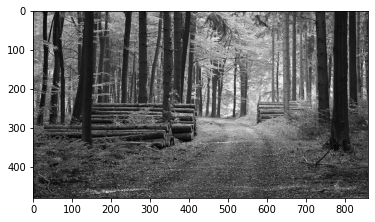

In [8]:
img_ori = cv2.imread("./images/forest.jpg", flags=0)
print(img_ori.shape)
plt.imshow(img_ori, "gray", norm=no_norm)

In [9]:
def show_dilate(img, process_type=1):
    kernel = np.ones((5,5), np.uint8)
    plt.figure(figsize=(12, 7))
    plt.subplot(2, 2, 1)
    plt.imshow(img, "gray", norm=no_norm), plt.title("Original")
    for i in range(3):
        plt.subplot(2, 2, 2 + i)
        if process_type == 1:
            plt.imshow(cv2.dilate(img, kernel, iterations=i+1), "gray", norm=no_norm)
        elif process_type == 2:
            plt.imshow(cv2.erode(img, kernel, iterations=i+1), "gray", norm=no_norm)
        else:
            print("Error: Invalid process_type!")
        plt.title("Iterations = " + str(i+1))

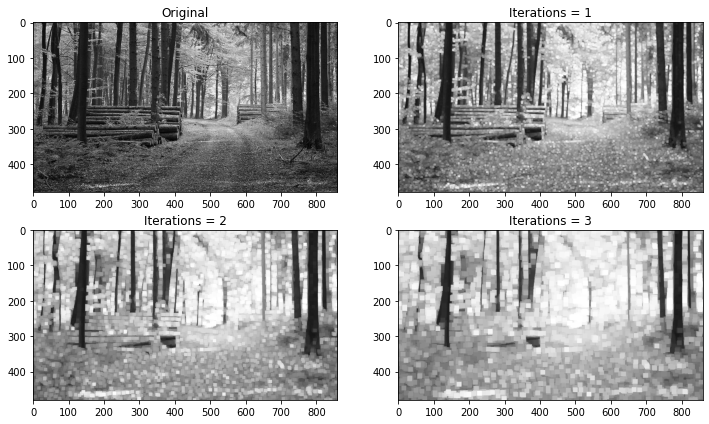

In [10]:
show_dilate(img_ori, process_type=1)

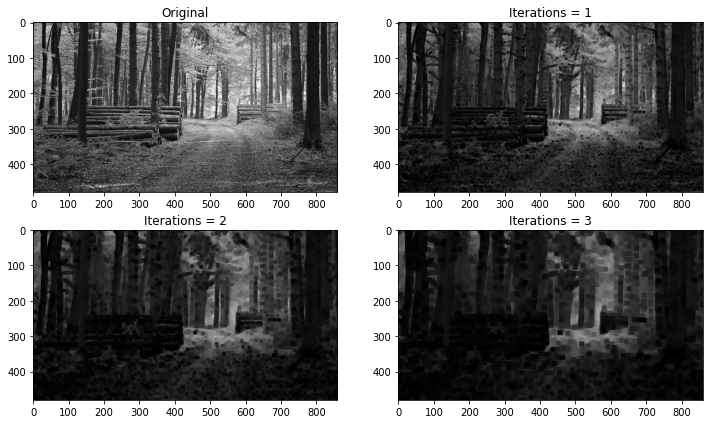

In [11]:
show_dilate(img_ori, process_type=2)

In [12]:
def show_morphology_specific(img, type_process=1):
    kernel = np.ones((5, 5), np.uint8)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, "gray", norm=no_norm), plt.title("ORIGINAL")
    op_s = [cv2.MORPH_OPEN, cv2.MORPH_CLOSE, cv2.MORPH_GRADIENT, 
            cv2.MORPH_TOPHAT, cv2.MORPH_BLACKHAT]
    titles = ["OPEN", "CLOSE", "GRADIENT", "TOP-HAT", "BLACK-HAT"]
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.morphologyEx(img, op_s[type_process - 1], kernel), 
               "gray", norm=no_norm)
    plt.title(titles[type_process - 1])

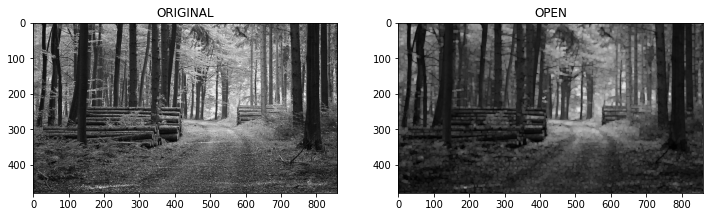

In [13]:
show_morphology_specific(img_ori, type_process=1)

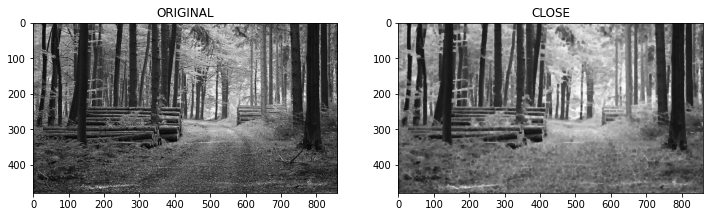

In [14]:
show_morphology_specific(img_ori, type_process=2)

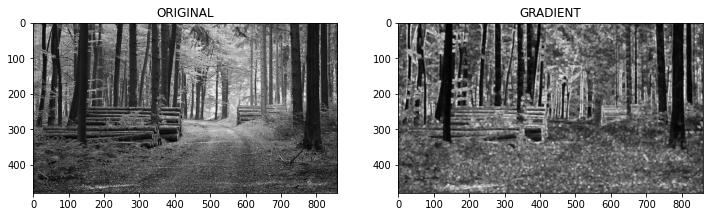

In [15]:
show_morphology_specific(img_ori, type_process=3)

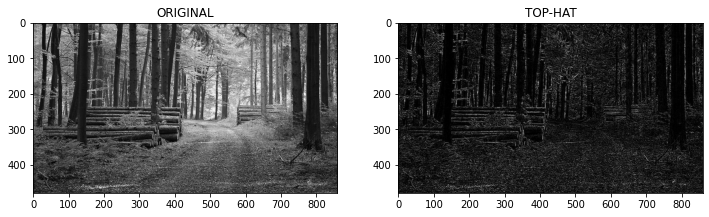

In [16]:
show_morphology_specific(img_ori, type_process=4)

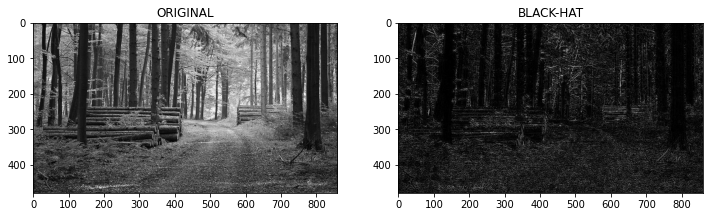

In [17]:
show_morphology_specific(img_ori, type_process=5)

In [18]:
def show_morphology(img):
    kernel = np.ones((5, 5), np.uint8)
    plt.figure(figsize=(21, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(img, "gray", norm=no_norm), plt.title("ORIGINAL")
    op_s = [cv2.MORPH_OPEN, cv2.MORPH_CLOSE, cv2.MORPH_GRADIENT, 
            cv2.MORPH_TOPHAT, cv2.MORPH_BLACKHAT]
    titles = ["OPEN", "CLOSE", "GRADIENT", "TOP-HAT", "BLACK-HAT"]
    for i in range(5):
        plt.subplot(2, 3, i + 2)
        plt.imshow(cv2.morphologyEx(img, op_s[i], kernel), "gray", norm=no_norm)
        plt.title(titles[i])

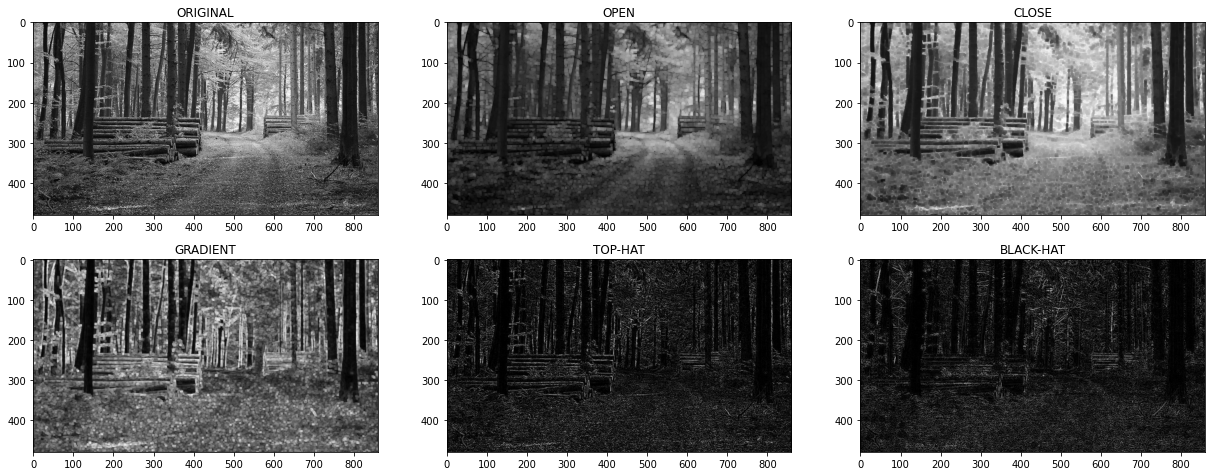

In [19]:
show_morphology(img_ori)